In [1]:
import os
import re
import sys
sys.path.insert(0, '/media/allen/mass/pytorch_Realtime_Multi-Person_Pose_Estimation/')

import math
import time
import argparse

import numpy as np
import pylab as plt
import glob
import shutil
from collections import OrderedDict

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.autograd import Variable
from torchvision import transforms as T

import cv2
from PIL import Image 

from network.post import decode_pose, plot_pose


trans = T.Compose([T.ToTensor(), T.Normalize(mean=[0.5,0.5,0.5], std=[0.5,0.5,0.5])])
def to_pil(cv_img):
    img = cv2.cvtColor(cv_img, cv2.COLOR_BGR2RGB)
    return Image.fromarray(img)

In [2]:
import sys
import os.path as osp
sys.path.insert(0, '/media/allen/mass/deep-learning-works/')
from config.config_manager import _C as model_config
from config.config_manager import _A as app_config
from app.Person_Search import App
from app.load_pose import *

model_config.merge_from_file("/media/allen/mass/deep-learning-works/reid_app.yml")
app_config.merge_from_file("/media/allen/mass/deep-learning-works/app.yml")
app = App(model_config, app_config)

2019-12-09 11:05:13,906 logger INFO: Using GPU: 1
2019-12-09 11:05:17,538 logger INFO: Resuming model from /media/allen/mass/deep-learning-works/caffe_models/OSNet_merge_cels_triplet_center_Adam_lr_0.003_warmup_10_0.01_plateau_10_flip_crop_erase_imagenet_0.7096.pth
2019-12-09 11:05:18,269 logger INFO: opt_0 is skipped
2019-12-09 11:05:18,272 logger INFO: opt_1 is skipped
2019-12-09 11:05:18,301 logger INFO: model backbone.conv1.conv.weight                              ...... loaded
2019-12-09 11:05:18,302 logger INFO: model backbone.conv1.bn.weight                                ...... loaded
2019-12-09 11:05:18,303 logger INFO: model backbone.conv1.bn.bias                                  ...... loaded
2019-12-09 11:05:18,304 logger INFO: model backbone.conv1.bn.running_mean                          ...... loaded
2019-12-09 11:05:18,305 logger INFO: model backbone.conv1.bn.running_var                           ...... loaded
2019-12-09 11:05:18,306 logger INFO: model backbone.conv2.0.c

2019-12-09 11:05:18,360 logger INFO: model backbone.conv2.0.conv2d.2.bn.running_var                ...... loaded
2019-12-09 11:05:18,361 logger INFO: model backbone.conv2.0.conv2d.3.conv1.weight                  ...... loaded
2019-12-09 11:05:18,362 logger INFO: model backbone.conv2.0.conv2d.3.conv2.weight                  ...... loaded
2019-12-09 11:05:18,362 logger INFO: model backbone.conv2.0.conv2d.3.bn.weight                     ...... loaded
2019-12-09 11:05:18,363 logger INFO: model backbone.conv2.0.conv2d.3.bn.bias                       ...... loaded
2019-12-09 11:05:18,364 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_mean               ...... loaded
2019-12-09 11:05:18,365 logger INFO: model backbone.conv2.0.conv2d.3.bn.running_var                ...... loaded
2019-12-09 11:05:18,366 logger INFO: model backbone.conv2.0.gate.fc1.weight                        ...... loaded
2019-12-09 11:05:18,367 logger INFO: model backbone.conv2.0.gate.fc1.bias                       

2019-12-09 11:05:18,423 logger INFO: model backbone.conv2.1.conv2d.0.bn.running_var                ...... loaded
2019-12-09 11:05:18,424 logger INFO: model backbone.conv2.1.conv2d.1.conv1.weight                  ...... loaded
2019-12-09 11:05:18,425 logger INFO: model backbone.conv2.1.conv2d.1.conv2.weight                  ...... loaded
2019-12-09 11:05:18,426 logger INFO: model backbone.conv2.1.conv2d.1.bn.weight                     ...... loaded
2019-12-09 11:05:18,427 logger INFO: model backbone.conv2.1.conv2d.1.bn.bias                       ...... loaded
2019-12-09 11:05:18,428 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_mean               ...... loaded
2019-12-09 11:05:18,429 logger INFO: model backbone.conv2.1.conv2d.1.bn.running_var                ...... loaded
2019-12-09 11:05:18,430 logger INFO: model backbone.conv2.1.conv2d.2.conv1.weight                  ...... loaded
2019-12-09 11:05:18,430 logger INFO: model backbone.conv2.1.conv2d.2.conv2.weight               

2019-12-09 11:05:18,482 logger INFO: model backbone.conv3.0.conv2c.1.bn.running_var                ...... loaded
2019-12-09 11:05:18,483 logger INFO: model backbone.conv3.0.conv2c.2.conv1.weight                  ...... loaded
2019-12-09 11:05:18,484 logger INFO: model backbone.conv3.0.conv2c.2.conv2.weight                  ...... loaded
2019-12-09 11:05:18,485 logger INFO: model backbone.conv3.0.conv2c.2.bn.weight                     ...... loaded
2019-12-09 11:05:18,486 logger INFO: model backbone.conv3.0.conv2c.2.bn.bias                       ...... loaded
2019-12-09 11:05:18,487 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_mean               ...... loaded
2019-12-09 11:05:18,487 logger INFO: model backbone.conv3.0.conv2c.2.bn.running_var                ...... loaded
2019-12-09 11:05:18,488 logger INFO: model backbone.conv3.0.conv2d.0.conv1.weight                  ...... loaded
2019-12-09 11:05:18,489 logger INFO: model backbone.conv3.0.conv2d.0.conv2.weight               

2019-12-09 11:05:18,545 logger INFO: model backbone.conv3.1.conv2b.1.bn.running_var                ...... loaded
2019-12-09 11:05:18,546 logger INFO: model backbone.conv3.1.conv2c.0.conv1.weight                  ...... loaded
2019-12-09 11:05:18,547 logger INFO: model backbone.conv3.1.conv2c.0.conv2.weight                  ...... loaded
2019-12-09 11:05:18,548 logger INFO: model backbone.conv3.1.conv2c.0.bn.weight                     ...... loaded
2019-12-09 11:05:18,549 logger INFO: model backbone.conv3.1.conv2c.0.bn.bias                       ...... loaded
2019-12-09 11:05:18,550 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_mean               ...... loaded
2019-12-09 11:05:18,551 logger INFO: model backbone.conv3.1.conv2c.0.bn.running_var                ...... loaded
2019-12-09 11:05:18,552 logger INFO: model backbone.conv3.1.conv2c.1.conv1.weight                  ...... loaded
2019-12-09 11:05:18,553 logger INFO: model backbone.conv3.1.conv2c.1.conv2.weight               

2019-12-09 11:05:18,616 logger INFO: model backbone.conv4.0.conv2a.bn.running_var                  ...... loaded
2019-12-09 11:05:18,617 logger INFO: model backbone.conv4.0.conv2b.0.conv1.weight                  ...... loaded
2019-12-09 11:05:18,618 logger INFO: model backbone.conv4.0.conv2b.0.conv2.weight                  ...... loaded
2019-12-09 11:05:18,618 logger INFO: model backbone.conv4.0.conv2b.0.bn.weight                     ...... loaded
2019-12-09 11:05:18,619 logger INFO: model backbone.conv4.0.conv2b.0.bn.bias                       ...... loaded
2019-12-09 11:05:18,620 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_mean               ...... loaded
2019-12-09 11:05:18,621 logger INFO: model backbone.conv4.0.conv2b.0.bn.running_var                ...... loaded
2019-12-09 11:05:18,622 logger INFO: model backbone.conv4.0.conv2b.1.conv1.weight                  ...... loaded
2019-12-09 11:05:18,623 logger INFO: model backbone.conv4.0.conv2b.1.conv2.weight               

2019-12-09 11:05:18,669 logger INFO: model backbone.conv4.0.downsample.bn.bias                     ...... loaded
2019-12-09 11:05:18,670 logger INFO: model backbone.conv4.0.downsample.bn.running_mean             ...... loaded
2019-12-09 11:05:18,671 logger INFO: model backbone.conv4.0.downsample.bn.running_var              ...... loaded
2019-12-09 11:05:18,672 logger INFO: model backbone.conv4.1.conv1.conv.weight                      ...... loaded
2019-12-09 11:05:18,673 logger INFO: model backbone.conv4.1.conv1.bn.weight                        ...... loaded
2019-12-09 11:05:18,674 logger INFO: model backbone.conv4.1.conv1.bn.bias                          ...... loaded
2019-12-09 11:05:18,675 logger INFO: model backbone.conv4.1.conv1.bn.running_mean                  ...... loaded
2019-12-09 11:05:18,676 logger INFO: model backbone.conv4.1.conv1.bn.running_var                   ...... loaded
2019-12-09 11:05:18,677 logger INFO: model backbone.conv4.1.conv2a.conv1.weight                 

2019-12-09 11:05:18,728 logger INFO: model backbone.conv4.1.conv2d.3.bn.running_var                ...... loaded
2019-12-09 11:05:18,729 logger INFO: model backbone.conv4.1.gate.fc1.weight                        ...... loaded
2019-12-09 11:05:18,729 logger INFO: model backbone.conv4.1.gate.fc1.bias                          ...... loaded
2019-12-09 11:05:18,730 logger INFO: model backbone.conv4.1.gate.fc2.weight                        ...... loaded
2019-12-09 11:05:18,731 logger INFO: model backbone.conv4.1.gate.fc2.bias                          ...... loaded
2019-12-09 11:05:18,731 logger INFO: model backbone.conv4.1.conv3.conv.weight                      ...... loaded
2019-12-09 11:05:18,732 logger INFO: model backbone.conv4.1.conv3.bn.weight                        ...... loaded
2019-12-09 11:05:18,733 logger INFO: model backbone.conv4.1.conv3.bn.bias                          ...... loaded
2019-12-09 11:05:18,734 logger INFO: model backbone.conv4.1.conv3.bn.running_mean               

In [29]:
import pandas as pd
csv_src = '/media//allen/mass/office_color/office_color_polygon.csv'
df = pd.read_csv(csv_src, index_col=[0], dtype={'img':str, 'bbox':str, 'id':int, 'uc':str, 'lc':str, 'uci':int, 'lci':int})
df.uc = df.uc.fillna('-1 -1 -1')
df.lc = df.lc.fillna('-1 -1 -1')

df.uc = df.uc.apply(lambda x: np.array([i for i in map(int, x.split(" "))]))
df.lc = df.lc.apply(lambda x: np.array([i for i in map(int, x.split(" "))]))

ucs = np.vstack(df.uc.values)
lcs = np.vstack(df.lc.values)

uptsi = np.load(osp.join(osp.dirname(csv_src), 'uptsi.npy'))
upts  = np.load(osp.join(osp.dirname(csv_src), 'upts.npy'))
lptsi = np.load(osp.join(osp.dirname(csv_src), 'lptsi.npy'))
lpts  = np.load(osp.join(osp.dirname(csv_src), 'lpts.npy'))


In [123]:
df[df.img=='CAM1-2019-11-12_15-55-03_89943.jpg']

,img,id,bbox,uc,uci,lc,lci
2187,CAM1-2019-11-12_15-55-03_89943.jpg,1,"[764, 439, 869, 674]","[112, 57, 34]",-1,"[-1, -1, -1]",-1
2188,CAM1-2019-11-12_15-55-03_89943.jpg,2,"[824, 327, 897, 483]","[109, 27, 114]",-1,"[-1, -1, -1]",-1
2189,CAM1-2019-11-12_15-55-03_89943.jpg,3,"[1311, 278, 1408, 510]","[5, 26, 144]",-1,"[-1, -1, -1]",-1


In [124]:
i = 2189
df.loc[i].img
pattern = re.compile(r'\[(\d+), (\d+), (\d+), (\d+)\]')
x1, y1, x2, y2 = [i for i in map(int, pattern.search(df.loc[i, 'bbox']).groups())]

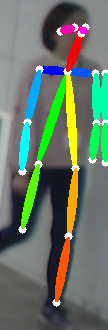

In [95]:
img_src = osp.join('/media//allen/mass/office/office_valid/', df.loc[i].img)
img = cv2.imread(img_src)[y1:y2, x1:x2, :]
persons, candidate = get_pose(app.PoseNet, img)
to_plot, canvas = plot_pose(img, candidate, persons)
to_pil(canvas)

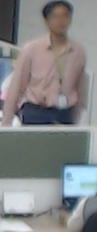

In [125]:
img_src = osp.join('/media//allen/mass/office/office_valid/', df.loc[i].img)
img = cv2.imread(img_src)[y1:y2, x1:x2, :]
to_pil(img)

In [96]:
part = UPPER[0]
person = persons[0]

In [97]:
x1, y1 = candidate[int(person[part[0]])][:2]
x2, y2 = candidate[int(person[part[1]])][:2]
x3, y3 = candidate[int(person[part[2]])][:2]
x4, y4 = candidate[int(person[part[3]])][:2]
polygon = np.array([[x1, y1],
                    [x3, y3], [x2, y2], [x4, y4]]).astype(int)
polygon[:,0] = np.clip(polygon[:,0], 0, img.shape[1])
polygon[:,1] = np.clip(polygon[:,1], 0, img.shape[0])
polygon = polygon.reshape(-1).tolist()                                       
temp = Image.new('L', (img.shape[1], img.shape[0]), 0)
ImageDraw.Draw(temp).polygon(polygon, outline=1, fill=1)
mask = np.array(temp).astype(bool)

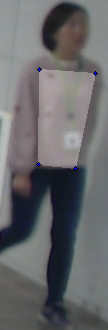

In [98]:
temp = img.copy()
temp[mask] += 50
app.visualize(temp, polygon, (255,0,0), 1)
to_pil(temp)

In [24]:
x1, y1 = candidate[int(person[part[2]])][:2]
x2, y2 = candidate[int(person[part[3]])][:2]
x, y = x2-x1, y2-y1
angle = np.arctan(x/y)
x_offset, y_offset = 2 * np.cos(angle), 2 * np.sin(angle)
polygon = np.array([[x1-x_offset, y1+y_offset], [x1+x_offset, y1-y_offset],
                    [x2+x_offset, y2-y_offset], [x2-x_offset, y2+y_offset]]).astype(int)
polygon[:,0] = np.clip(polygon[:,0], 0, img.shape[1])
polygon[:,1] = np.clip(polygon[:,1], 0, img.shape[0])
polygon = polygon.reshape(-1).tolist()                                       
temp = Image.new('L', (img.shape[1], img.shape[0]), 0)
ImageDraw.Draw(temp).polygon(polygon, outline=1, fill=1)
mask = np.array(temp).astype(bool)

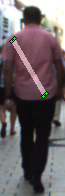

In [25]:
temp = img.copy()
temp[mask] += 100
app.visualize(temp, polygon, (0,255,0), 1)
to_pil(temp)

In [26]:
x1, y1 = candidate[int(person[part[2]])][:2]
x_offset, y_offset = 2 , 2
polygon = np.array([[x1-x_offset, y1+y_offset], [x1+x_offset, y1-y_offset],
                    [x1-x_offset, y1-y_offset], [x1+x_offset, y1+y_offset]]).astype(int)
polygon[:,0] = np.clip(polygon[:,0], 0, img.shape[1])
polygon[:,1] = np.clip(polygon[:,1], 0, img.shape[0])
polygon = polygon.reshape(-1).tolist()                                       
temp = Image.new('L', (img.shape[1], img.shape[0]), 0)
ImageDraw.Draw(temp).polygon(polygon, outline=1, fill=1)
mask = np.array(temp).astype(bool)

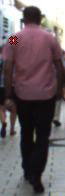

In [27]:
temp = img.copy()
temp[mask] += 100
app.visualize(temp, polygon, (0,0,255), 1)
to_pil(temp)

In [10]:
polygon

[11, 42, 15, 38, 11, 38, 15, 42]